# Laptop Price Prediction

In [1]:
# Import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

import warnings
warnings.simplefilter("ignore")

## Data Collection 

In [2]:
df =  pd.read_csv('laptop_data.csv')
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [3]:
# check column names
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [4]:
# check no.of rows and columns
df.shape

(1303, 12)

In [5]:
# check information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
# check duplicate values in dataset
df.duplicated().sum()

0

In [7]:
# check null values
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

## Data Wranglling

In [8]:
# drop unnecessory columns
df.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


## Exploratory Data Analysis

In [10]:
# make values of columns more readable
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')

In [11]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [12]:
# convert object data type into numeric
df['Ram']=df['Ram'].astype(int)
df['Weight']=df['Weight'].astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 107.0+ KB


<AxesSubplot:xlabel='Price', ylabel='Density'>

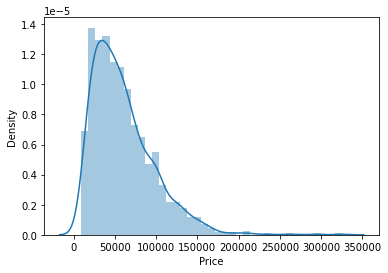

In [14]:
# check price distribution
sns.distplot(df['Price'])

<AxesSubplot:>

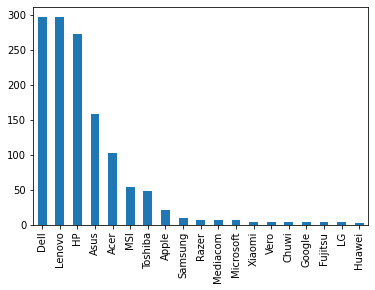

In [15]:
# check popularity of laptop brands
df['Company'].value_counts().plot(kind='bar')

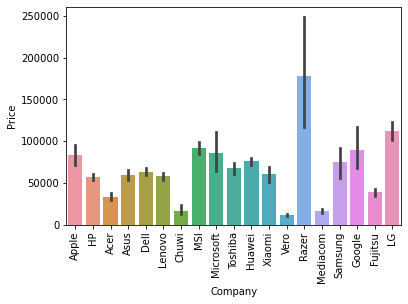

In [16]:
# check price distributon according to companies
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

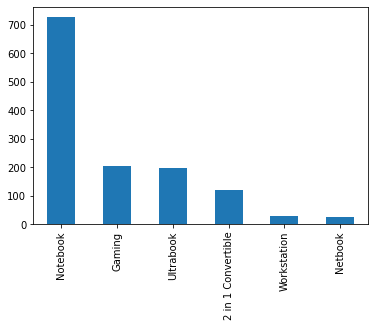

In [17]:
# check popular type of laptop
df['TypeName'].value_counts().plot(kind='bar')

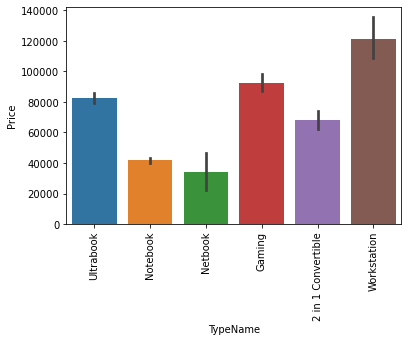

In [18]:
# check price distributon according to laptop type
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='Inches', ylabel='Density'>

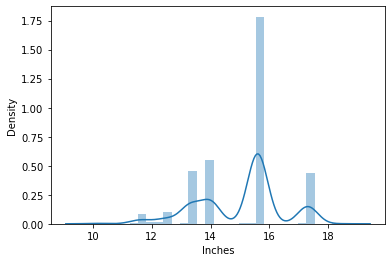

In [19]:
# check popular  size of laptop
sns.distplot(df['Inches'])

<AxesSubplot:xlabel='Inches', ylabel='Price'>

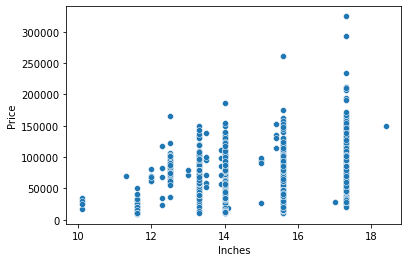

In [20]:
# check relation between screen size and price of laptop
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [21]:
# check screen resolution options
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [22]:
# create new column of touch screen screen
df['Touch_screen']=df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

<AxesSubplot:>

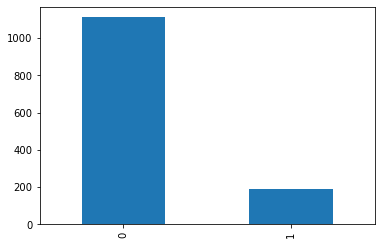

In [23]:
# check value counts of touch screen options
df['Touch_screen'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Touch_screen', ylabel='Price'>

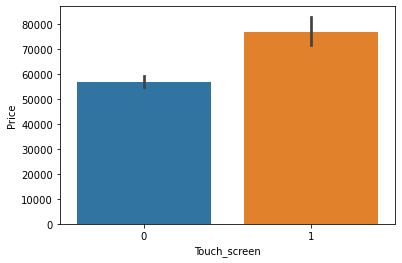

In [24]:
# check relation of touch screen and price
sns.barplot(x=df['Touch_screen'],y=df['Price'])

In [25]:
# create new column of ips screen 
df['Ips']=df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

<AxesSubplot:>

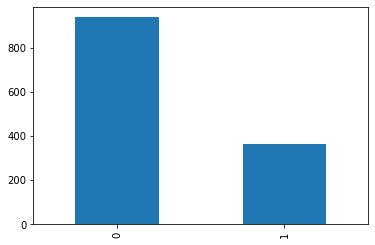

In [26]:
# check value counts of ips screen options
df['Ips'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Ips', ylabel='Price'>

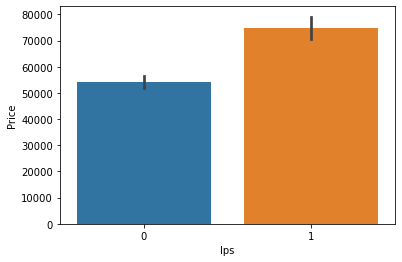

In [27]:
# check relation of ips screen and price
sns.barplot(x=df['Ips'],y=df['Price'])

In [28]:
new=df['ScreenResolution'].str.split('x',n=1,expand=True)

In [29]:
df['x_res']=new[0]
df['y_res']=new[1]

In [30]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_screen,Ips,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [31]:
df['x_res']= df['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x: x [0])

In [32]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_screen,Ips,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [33]:
# convert object data type into numeric data type
df['x_res']=df['x_res'].astype(int)
df['y_res']=df['y_res'].astype(int)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touch_screen      1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  x_res             1303 non-null   int32  
 14  y_res             1303 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 137.6+ KB


In [35]:
# drop screen resolution column 
df.drop(['ScreenResolution'],axis=1,inplace=True)

In [36]:
df['inch_reso']=(((df['x_res']**2)+(df['y_res']**2))**2/df['Inches']).astype(float)

In [37]:
df.drop(['x_res','y_res','Inches'],axis=1,inplace=True)

In [38]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_screen,Ips,inch_reso
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,1.223601e+08
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,6.937966e+06
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,2.321513e+07
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,9.587007e+07
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,1.223601e+08


In [39]:
# check cpu options 
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [40]:
df['Cpu_name']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [41]:
def funct(text):
    if text=="Intel Core i7" or text=="Intel Core i5" or text=="Intel Core i3":
        return text
    else:
        if text.split()[0]=='Intel':
            return "other intel processor"
        else:
            return "AMD Processor"

In [42]:
df['Cpu brand']=df['Cpu_name'].apply(funct)

<AxesSubplot:>

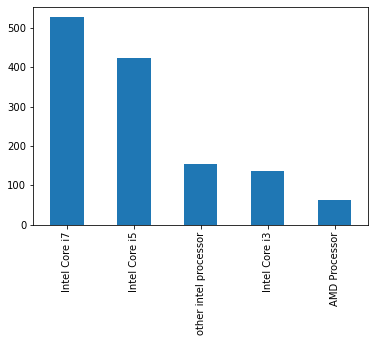

In [43]:
# check popularity of cpu 
df['Cpu brand'].value_counts().plot(kind='bar')

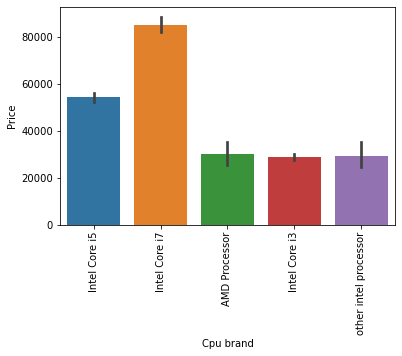

In [44]:
# check relation between type of cpu and price
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [45]:
# drop unnececesory columns
df.drop(['Cpu','Cpu_name'],axis=1,inplace=True)

<AxesSubplot:>

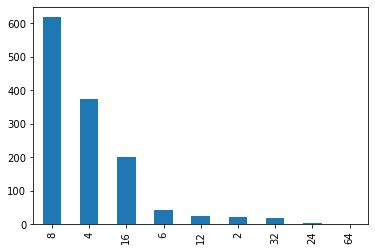

In [46]:
# check popularity of ram size
df['Ram'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Ram', ylabel='Price'>

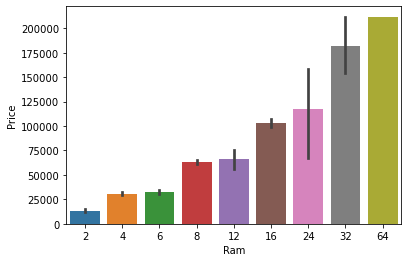

In [47]:
# check relation ram size and price
sns.barplot(x=df['Ram'],y=df['Price'])

In [48]:
# check memory options
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [49]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [50]:
# convert object data type into numeric
get_dummy=pd.get_dummies(df,columns=['Memory'],drop_first=True)
get_dummy.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touch_screen,Ips,inch_reso,...,Memory_512 SSD,Memory_512 SSD + 1000 HDD,Memory_512 SSD + 1000 Hybrid,Memory_512 SSD + 2000 HDD,Memory_512 SSD + 256 SSD,Memory_512 SSD + 512 SSD,Memory_64 Flash Storage,Memory_64 Flash Storage + 1000 HDD,Memory_64 SSD,Memory_8 SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,1.223601e+08,...,0,0,0,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,6.937966e+06,...,0,0,0,0,0,0,0,0,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,2.321513e+07,...,0,0,0,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,9.587007e+07,...,1,0,0,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,1.223601e+08,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# convert object data type into numeric
df=pd.get_dummies(get_dummy,columns=['Gpu'],drop_first=True)
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touch_screen,Ips,inch_reso,Cpu brand,...,Gpu_Nvidia Quadro M1000M,Gpu_Nvidia Quadro M1200,Gpu_Nvidia Quadro M2000M,Gpu_Nvidia Quadro M2200,Gpu_Nvidia Quadro M2200M,Gpu_Nvidia Quadro M3000M,Gpu_Nvidia Quadro M500M,Gpu_Nvidia Quadro M520M,Gpu_Nvidia Quadro M620,Gpu_Nvidia Quadro M620M
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,1.223601e+08,Intel Core i5,...,0,0,0,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,6.937966e+06,Intel Core i5,...,0,0,0,0,0,0,0,0,0,0
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,2.321513e+07,Intel Core i5,...,0,0,0,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,9.587007e+07,Intel Core i7,...,0,0,0,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,1.223601e+08,Intel Core i5,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# import label encoder
from sklearn.preprocessing import LabelEncoder

In [53]:
label_encoder = LabelEncoder()
array = label_encoder.fit_transform(df['Company'])
array

array([ 1,  1,  7, ..., 10,  7,  2])

In [54]:
df['Company']=array

In [55]:
label_encoder = LabelEncoder()
array = label_encoder.fit_transform(df['TypeName'])
array

array([4, 4, 3, ..., 3, 3, 3])

In [56]:
df['TypeName']=array

In [57]:
label_encoder = LabelEncoder()
array = label_encoder.fit_transform(df['OpSys'])
array

array([8, 8, 4, ..., 5, 5, 5])

In [58]:
df['OpSys']=array

In [59]:
label_encoder = LabelEncoder()
array = label_encoder.fit_transform(df['Cpu brand'])
array

array([2, 2, 2, ..., 4, 3, 4])

In [60]:
df['Cpu brand']=array

In [61]:
# Final dataset
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touch_screen,Ips,inch_reso,Cpu brand,...,Gpu_Nvidia Quadro M1000M,Gpu_Nvidia Quadro M1200,Gpu_Nvidia Quadro M2000M,Gpu_Nvidia Quadro M2200,Gpu_Nvidia Quadro M2200M,Gpu_Nvidia Quadro M3000M,Gpu_Nvidia Quadro M500M,Gpu_Nvidia Quadro M520M,Gpu_Nvidia Quadro M620,Gpu_Nvidia Quadro M620M
0,1,4,8,8,1.37,71378.6832,0,1,1.223601e+08,2,...,0,0,0,0,0,0,0,0,0,0
1,1,4,8,8,1.34,47895.5232,0,0,6.937966e+06,2,...,0,0,0,0,0,0,0,0,0,0
2,7,3,8,4,1.86,30636.0000,0,0,2.321513e+07,2,...,0,0,0,0,0,0,0,0,0,0
3,1,4,16,8,1.83,135195.3360,0,1,9.587007e+07,3,...,0,0,0,0,0,0,0,0,0,0
4,1,4,8,8,1.37,96095.8080,0,1,1.223601e+08,2,...,0,0,0,0,0,0,0,0,0,0


In [62]:
# check corelation
df.corr()

,Company,TypeName,Ram,OpSys,Weight,Price,Touch_screen,Ips,inch_reso,Cpu brand,...,Gpu_Nvidia Quadro M1000M,Gpu_Nvidia Quadro M1200,Gpu_Nvidia Quadro M2000M,Gpu_Nvidia Quadro M2200,Gpu_Nvidia Quadro M2200M,Gpu_Nvidia Quadro M3000M,Gpu_Nvidia Quadro M500M,Gpu_Nvidia Quadro M520M,Gpu_Nvidia Quadro M620,Gpu_Nvidia Quadro M620M
Company,1.000000,-0.007718,0.046508,0.134290,-0.129610,0.140371,0.038703,0.118205,0.006103,0.007639,...,0.007573,-0.015855,0.019757,0.005351,0.041856,0.003782,0.024147,0.034162,-0.037137,0.024147
TypeName,-0.007718,1.000000,-0.242862,0.085223,-0.267002,-0.127313,-0.417188,-0.162855,0.086144,-0.113119,...,0.107773,0.161971,0.044649,0.076148,0.016112,0.053824,-0.057498,0.076148,0.120540,0.009295
Ram,0.046508,-0.242862,1.000000,0.139367,0.383874,0.743007,0.116984,0.206623,-0.046209,0.225404,...,-0.004173,0.022899,0.058764,0.027908,0.097202,-0.002084,-0.002084,0.058764,0.034408,-0.002084
OpSys,0.134290,0.085223,0.139367,1.000000,0.006480,0.288911,-0.004832,0.092071,0.074097,-0.102924,...,0.090681,0.015400,0.083015,0.007240,0.008871,0.058678,0.058678,0.045128,0.011461,0.005118
Weight,-0.129610,-0.267002,0.383874,0.006480,1.000000,0.210370,-0.294620,0.016967,0.009254,-0.055239,...,0.021377,0.069390,0.041922,0.048995,0.037402,0.040047,-0.009946,0.017757,0.012434,0.056712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gpu_Nvidia Quadro M3000M,0.003782,0.053824,-0.002084,0.058678,0.040047,0.112074,-0.011521,0.044427,-0.011489,0.015671,...,-0.001538,-0.002311,-0.001087,-0.001087,-0.001331,1.000000,-0.000768,-0.001087,-0.001720,-0.000768
Gpu_Nvidia Quadro M500M,0.024147,-0.057498,-0.002084,0.058678,-0.009946,0.036755,0.066665,0.044427,-0.006582,0.015671,...,-0.001538,-0.002311,-0.001087,-0.001087,-0.001331,-0.000768,1.000000,-0.001087,-0.001720,-0.000768
Gpu_Nvidia Quadro M520M,0.034162,0.076148,0.058764,0.045128,0.017757,0.081549,-0.016299,0.019198,0.038245,0.022171,...,-0.002176,-0.003270,-0.001537,-0.001537,-0.001883,-0.001087,-0.001087,1.000000,-0.002433,-0.001087
Gpu_Nvidia Quadro M620,-0.037137,0.120540,0.034408,0.011461,0.012434,0.075120,0.009219,0.016568,-0.020650,0.047625,...,-0.003444,-0.005176,-0.002433,-0.002433,-0.002982,-0.001720,-0.001720,-0.002433,1.000000,-0.001720


## Model Development

In [63]:
x=df.drop('Price',axis=1)
y=df.Price

In [64]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [67]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)
y_pred=lr_model.predict(x_test)
r2=r2_score(y_test,y_pred)
print('r2 score is : ',r2)

r2 score is :  0.7520582476279225


## Save Model

In [70]:
import pickle

# save the model to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)